In [3]:
import sys
import numpy as np
import os.path as osp
import tensorflow as tf
import glob
import matplotlib.pylab as plt

import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id

from general_tools.notebook.tf import reset_tf_graph                                              
from general_tools.in_out.basics import create_dir, delete_files_in_directory, files_in_subdirs
from general_tools.simpletons import select_first_last_and_k, indices_in_iterable

from geo_tool import Point_Cloud

from tf_lab.autopredictors.exploration import latent_embedding_of_entire_dataset

from tf_lab.autopredictors.evaluate import eval_model, read_saved_epochs

from general_tools.strings import trim_content_after_last_dot

from general_tools.plotting import stack_images_in_square_grid

from tf_lab.nips.helper import pclouds_centered_and_half_sphere, zero_mean_half_sphere
import scipy.stats as stats

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
top_pcloud_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/chair_mlp_arch_raw_gan_2048_pts/'
epoch = '610'
in_pc_file = osp.join(top_pcloud_dir, 'epoch_' + str(epoch) + '.npz')

In [35]:
pc_data = np.load(in_pc_file)
pc_data = pc_data[pc_data.keys()[0]]
n_pc = pc_data.shape[0]

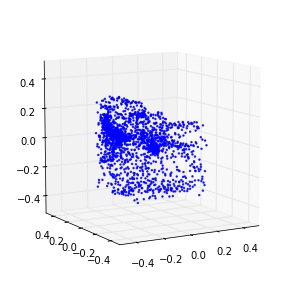

In [52]:
Point_Cloud(pc_data[np.random.randint(n_pc)]).plot(in_u_sphere=True);

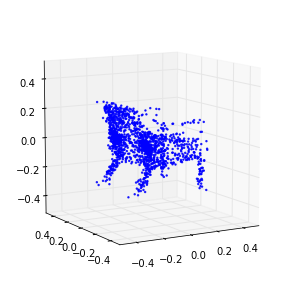

In [33]:
Point_Cloud(pc_data[900]).plot(in_u_sphere=True);

In [ ]:
# top_fig_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/images/
# /OUT/nips/images/' + ae_tag + '_'
# top_fig_dir = create_dir(osp.join(top_fig_dir, ae_tag + 'epoch_50'))
# syn_data = our_data 
# # Fix above

# size = 100
# rids = np.random.choice(range(len(syn_data)), size=size, replace=False)
# plt.ioff()

# for i in range(size):
#     fig = Point_Cloud(syn_data[rids[i]]).plot(show=False, show_axis=False, azim=290, in_u_sphere=False, s=20);
#     fig.savefig(osp.join(top_fig_dir, 'sample_' +str(i)))
#     plt.close()

# file_names = glob.glob(top_fig_dir +'/*.png')
# stack_images_in_square_grid(file_names, save_file= osp.join(top_fig_dir, 'aggregate_samples.png'));
# plt.ion()